For today's lab. You are going to find 2 datasets, one for classification and one for regression. Perform random forest for both and show your results.

<h1 align="center">Random Forest Classification</h1>

Dataset Name: Pima Indians Diabetes Database

Description: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset consists of several medical predictor variables and one target variable, Outcome.

Source: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

Objective:  To use a Random Forest Classification model and present the results.

## Explanation of Each Column:

| Column Name               | Description                                | Data Type | Notes                                    |
|---------------------------|--------------------------------------------|-----------|------------------------------------------|
| Pregnancies               | Number of times pregnant                   | integer   |                                          |
| Glucose                   | Plasma glucose concentration               | integer   | a 2 hour oral glucose tolerant test      |
| Blood Pressure            | Diastolic blood pressure                   | integer   | mm Hg                                    |
| Skin Thickness            | Triceps skin fold thickness                | integer   | mm                                       |
| Insulin                   | 2 hour serum insulin                       | integer   | U/ml                                     |
| BMI                       | Body mass index                            | float     | weight in kg/(height in m)^2             |
| DiabetesPedigreeFunction  | Diabetes pedigree function                 | float     |                                          |
| Age                       | Age (years)                                | integer   |                                          |
| Outcome                   | Target                                     | integer   | No diabetes=0, diabetes=1                |



##Visual Inspection of the Data

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.read_csv('diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(df.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


###Exploratory Data Analysis

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

There are no missing values in the DataFrame.

No duplicate rows found in the DataFrame.

Unique Values:
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickn

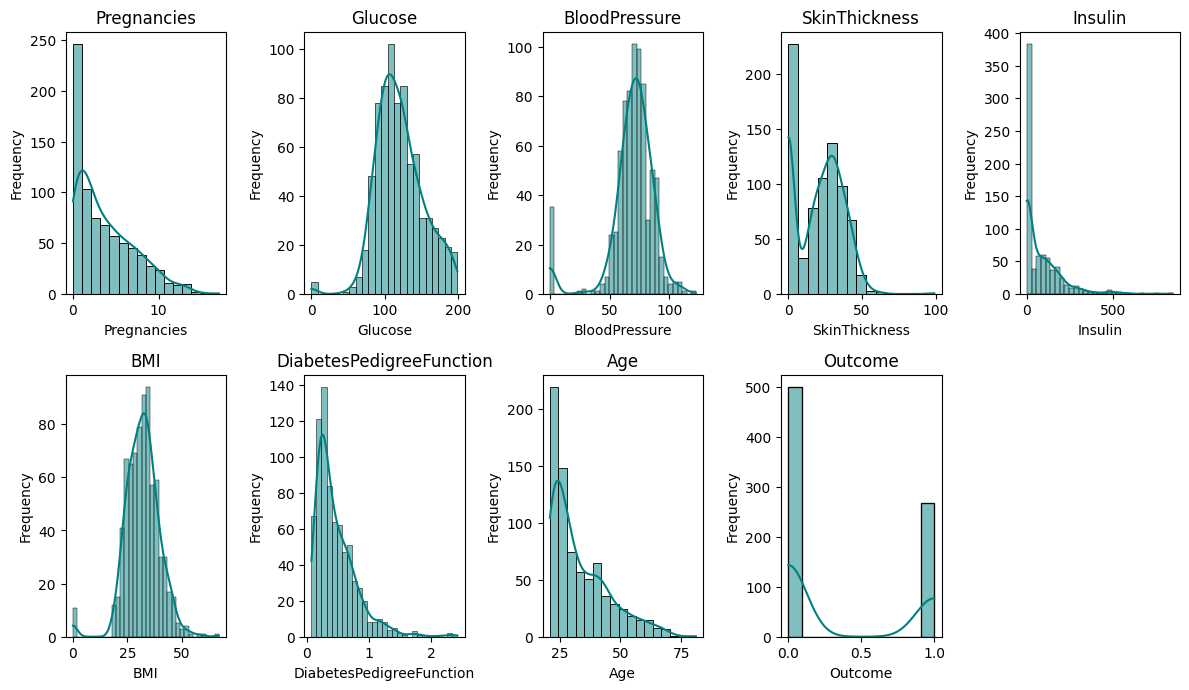


Correlation Summaries:
Age and Pregnancies: There is a moderate correlation (0.5443).
Insulin and Glucose: There is a moderate correlation (0.3314).
Outcome and Glucose: There is a moderate correlation (0.4666).
Insulin and SkinThickness: There is a moderate correlation (0.4368).
BMI and SkinThickness: There is a moderate correlation (0.3926).


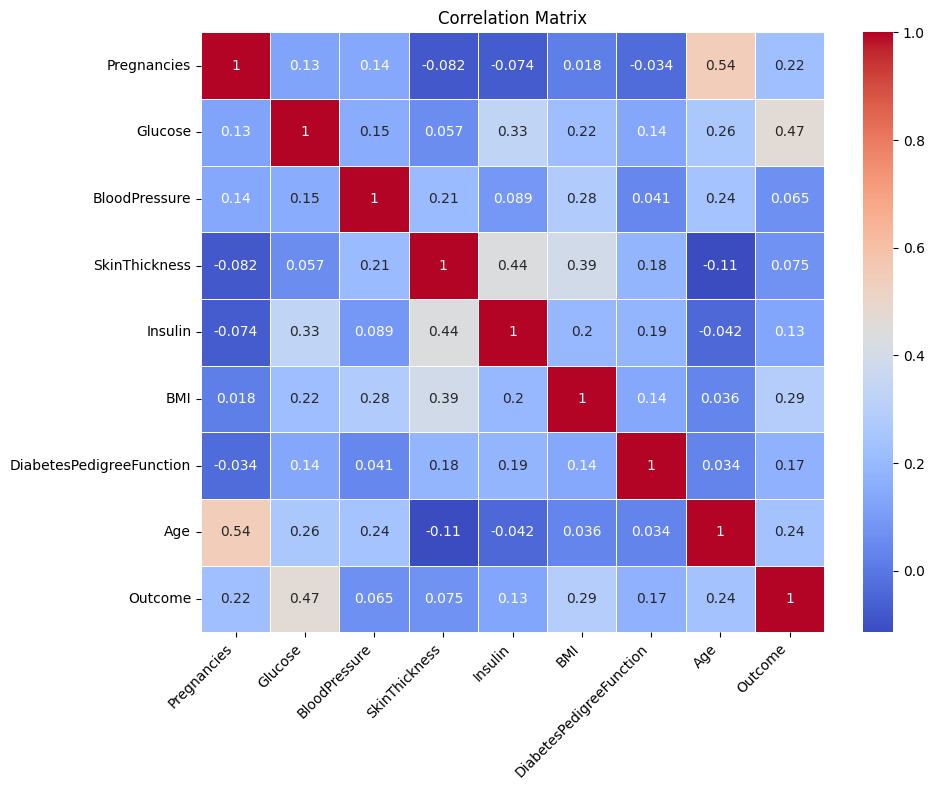


Variance of Numerical Columns:
Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64


In [ ]:

# Dataframe Information
print("Dataframe Information:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum().sum()
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()

#Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found in the DataFrame:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the DataFrame.")
print()

# Check unique values
print("Unique Values:")
# Get the number of unique values for each column
unique_counts = df.nunique()
# Display the number of unique values
print(unique_counts)

# Get value counts for the 'quality' column
value_counts = df['Outcome'].value_counts()
print("Value counts for 'Outcome' column:")
print(value_counts)
print()

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Check for outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers according to IQR method.")
print()
print()
print()

print("Histograms:")
print()
# Histograms
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print()

# Correlation matrix
corr_matrix = df.corr()

# Define thresholds for interpreting correlations
moderate_corr_threshold = 0.3
high_corr_threshold = 0.6

# Function to summarize correlations
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()  # To keep track of visited pairs
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:  # Exclude self-correlation (diagonal elements)
                pair = tuple(sorted([row, col]))  # Sort pair to avoid duplicate output
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]  # Access correlation value
                    if abs(correlation) >= high_corr_threshold:
                        print(f"{row} and {col}: There is a high correlation ({correlation:.4f}).")
                    elif abs(correlation) >= moderate_corr_threshold:
                        print(f"{row} and {col}: There is a moderate correlation ({correlation:.4f}).")

# Print correlation summaries
summarize_correlations(corr_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print()

# Calculate variance for numerical columns
print("Variance of Numerical Columns:")
variances = df[numerical_cols].var()
print(variances)

**Descriptive Statistics:**

Pregnancies: Ranges from 0-17, with a mean of ~3.85. The standard deviation is high, indicating variability.

Glucose: Ranges from 0-199, with a mean of about 120.89 and a high standard deviation, indicating variability in glucose levels.

BloodPressure: Ranges from 0-122, with a mean of 69.11. High standard deviation suggests variability.

SkinThickness: Ranges from 0-99, with a mean of 20.54. High variability is evident.

Insulin: Ranges from 0-846, with a mean of 79.80. High standard deviation due to wide range of values.

BMI: Ranges from 0-67.1, with a mean of 31.99 and moderate variability.

DiabetesPedigreeFunction: Ranges from 0.078-2.42, with a mean of 0.47. Low variance indicates less variability.

Age: Ranges from 21-81, with a mean of 33.24 and a standard deviation indicating a moderate spread.

Outcome: Binary variable with a mean of 0.35, indicating the proportion of positive cases (diabetes).

**Outliers:**

There seems to be many outliers which will be removed to avoid skewing the distribution, improved metrics and reduction of overfitting.

**Correlation:**

Moderate correlations:

Age and Pregnancies: 0.5443<br>
Insulin and Glucose: 0.3314<br>
Outcome and Glucose: 0.4666<br>
Insulin and SkinThickness: 0.4368<br>
BMI and SkinThickness: 0.3926<br>

**Variance:**

High Variance:<br>

Glucose, Insulin, BloodPressure have high variance, indicating significant spread in values.

Low Variance:

DiabetesPedigreeFunction has low variance, suggesting less variability among entries.

**Remove outliers**

In [ ]:

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each numerical column
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df = remove_outliers(df, col)

# Reset index after removing rows
df = df.reset_index(drop=True)


###Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Apply SelectKBest with chi-square test (use f_classif for continuous features)
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get feature scores
scores = selector.scores_
print("Feature Scores:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {scores[i]}")


Feature Scores:
Pregnancies: 98.44133329374014
Glucose: 1093.2544620592107
BloodPressure: 33.001442143275725
SkinThickness: 12.821334899797169
Insulin: 845.3110594057409
BMI: 58.27092748037933
DiabetesPedigreeFunction: 2.5290897097461693
Age: 164.6178398389465


Top Features: Insulin, Glucose, Age, BMI, and Pregnancies seem most relevant based on scores.

###Data Preparation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# features
features = ['Insulin', 'Glucose', 'Age', 'BMI', 'Pregnancies']
X = df[features]
y = df['Outcome']

# Print selected features
print("Selected features:")
print(X.columns.tolist())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print training and testing set sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Selected features:
['Insulin', 'Glucose', 'Age', 'BMI', 'Pregnancies']
Training set size: 508 samples
Testing set size: 128 samples


###Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# features / target
features = ['Insulin', 'Glucose', 'Age', 'BMI', 'Pregnancies']
X = df[features]
y = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the Random Forest model with balanced class weight
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict on training set
y_train_pred = model.predict(X_train)

# Predict on testing set
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

# Calculate metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

# Print metrics
print(f"Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
print(f"Test  - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")


Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test  - Accuracy: 0.7344, Precision: 0.7297, Recall: 0.7344, F1 Score: 0.7303


Specifying pos_label=1 in the metrics calculations won't change the output because 1 is already the default positive class for these metrics in a binary classification problem.

The model is likely overfitting the training data.

###Hyperparameter Tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Cross-Validation Score: 0.7658
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test - Accuracy: 0.7422, Precision: 0.7540, Recall: 0.7422, F1 Score: 0.7470


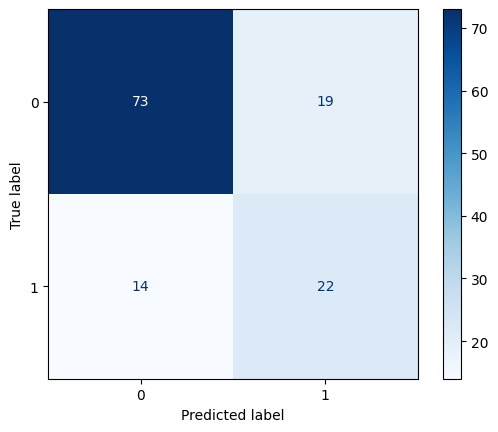

Confusion Matrix:
[[73 19]
 [14 22]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                    param_distributions=param_dist,
                                    n_iter=10,  # Number of parameter settings to sample
                                    cv=5,  # Number of cross-validation folds
                                    scoring='accuracy',  # Scoring metric
                                    n_jobs=-1,  # Use all available cores
                                    verbose=2,  # Verbosity level
                                    random_state=42)  # Seed for reproducibility

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Use the best model to make predictions on the test set
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Calculate metrics for the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

# Print metrics
print(f"Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
print(f"Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')

# Show the plot
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

The best cross-validation score of 0.7658 indicates that the model performs on average with an accuracy of approximately 76.58% across different folds of cross-validation. This score reflects the model's generalization ability and is used to estimate how well the model will perform on unseen data.

Training: These perfect training metrics suggest that the model fits the training data perfectly. However, such perfect scores often indicate potential overfitting, where the model may not generalize well to new, unseen data.

Testing: The test metrics show that the model performs reasonably well on the test set, but not as well as on the training set. The accuracy of 74.22% and F1 Score of 74.70% are indicative of a model that generalizes fairly well, but there is still room for improvement.

True Negatives (TN): 73 Top Left Cases were correctly predicted as No Diabetes.<br>
False Positives (FP): 19 Top Right Case was incorrectly predicted as Diabetes.<br>
False Negatives (FN): 14 Bottom Left Cases were incorrectly predicted as No Diabetes when actual is Diabetes.<br>
True Positives (TP): 22 Bottom Right Cases were correctly predicted as Diabetes.<br>
Test - Accuracy: 0.7422, Precision: 0.7540, Recall: 0.7422, F1 Score: 0.7470

###Summary

 After hyperparameter tuning, the Random Forest Classifcation Model's performance on the test set showed a slight improvement compared to the initial model. The training set has perfect scores across all measures, indicating overfitting and may not perform as effectively on new data. The test set metrics—accuracy of 0.7422, precision of 0.7540, recall of 0.7422, and F1 score of 0.7470—reflect a more generalizable model, though there is still room for improvement. Additional strategies  might be needed to further enhance the model's generalization capabilities.


<h1 align="center">Random Forest Regression</h1>

Dataset Name: Auto-mpg Database

Description: This dataset is originally from the UCI Machine Learning Repository. The dataset is technical spec of cars with mpg as the target.

Source: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/uciml/autompg-dataset)

Objective:  To use a Random Forest Regression model and present the results.

## Explanation of Each Column

| Column Name    | Description                                       | Data Type | Notes                                  |
|----------------|---------------------------------------------------|-----------|----------------------------------------|
| mpg            | Miles per gallon                                  | float     | Target variable for regression         |
| cylinders      | Number of cylinders in the engine                | integer   | Represents engine size and performance |
| displacement   | Engine displacement (in cubic inches)             | float     | Measure of engine size                 |
| horsepower     | Engine's horsepower                              | object     | Measures engine power output; to be converted           |
| weight         | Weight of the vehicle (in pounds)                | float     | Heavier vehicles may perform differently|
| acceleration   | Time to accelerate from 0 to 60 mph (in seconds) | float     | Indicates vehicle performance          |
| model year     | The model year of the vehicle                    | integer   | Represents the year of manufacture     |
| origin         | The origin of the vehicle (1 = American, 2 = European, 3 = Japanese) | integer   | Represents the vehicle's country of manufacture |
| car name      | Make and model                | object   | To be dropped as no predictive value |


##Visual Inspection of the Data

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.read_csv('auto-mpg.csv')

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [ ]:
print(df['horsepower'].head())

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object


Drop car name (categorical and doesn't contribute to predicting mpg).

In [ ]:
# Drop the 'car name' column
df = df.drop(columns=['car name'])



Convert horsepower.

In [ ]:
# Display non-numeric values
# removes all . in string and specifies replacement should be done literally then check if remaining string is numeric
# returns false if it's not numeric then filters and returns rows where horsepower values are not numeric after dot removal
non_numeric = df[~df['horsepower'].str.replace('.', '', regex=False).str.isnumeric()]
print(non_numeric)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin  
32           71       1  
126          74       1  
330          80       2  
336          80       1  
354          81       2  
374          82       1  


In [ ]:
# Replace '?' with NaN
df['horsepower'].replace('?', pd.NA, inplace=True)

# Convert 'horsepower' to numeric, coercing errors (non-numeric values or converting alues that can't be interpreted as numbers) to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Fill missing values with the median
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

###Exploratory Data Analysis

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB
None

There are no missing values in the DataFrame.

No duplicate rows found in the DataFrame.

Unique Values:
mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
dtype: int64
Value counts for 'mpg' column:
mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9   

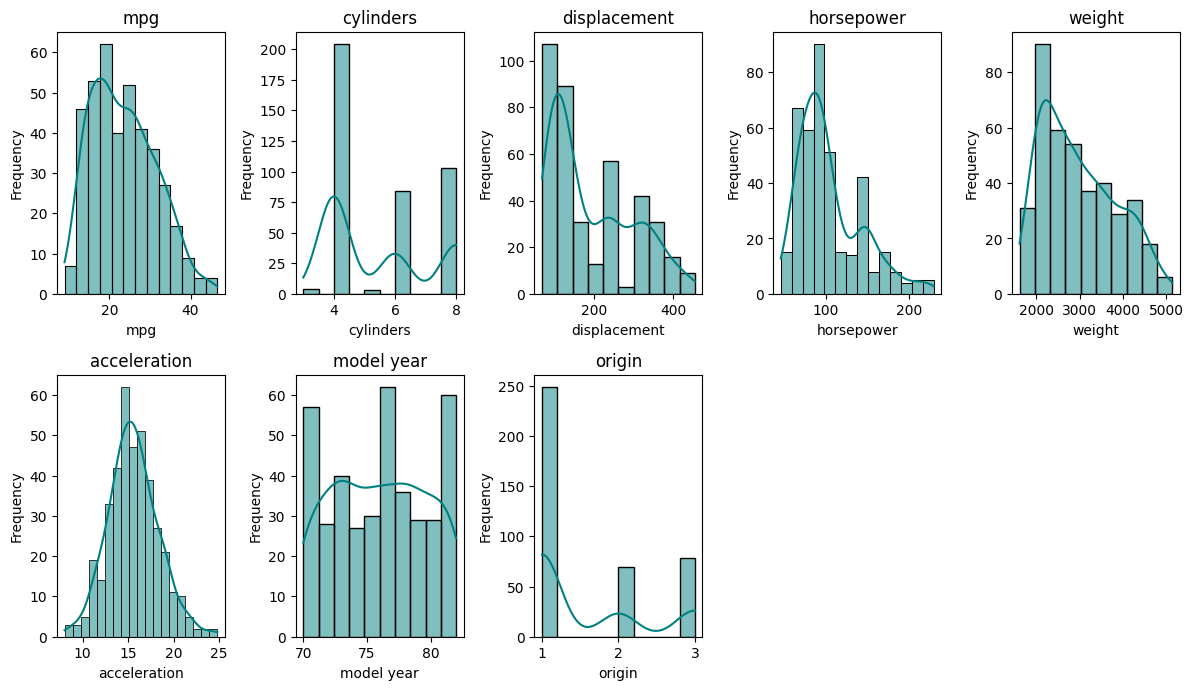


Correlation Summaries:
cylinders and mpg: There is a high correlation (-0.7754).
displacement and mpg: There is a high correlation (-0.8042).
horsepower and mpg: There is a high correlation (-0.7735).
weight and mpg: There is a high correlation (-0.8317).
acceleration and mpg: There is a moderate correlation (0.4203).
model year and mpg: There is a moderate correlation (0.5793).
origin and mpg: There is a moderate correlation (0.5635).
displacement and cylinders: There is a high correlation (0.9507).
horsepower and cylinders: There is a high correlation (0.8413).
weight and cylinders: There is a high correlation (0.8960).
acceleration and cylinders: There is a moderate correlation (-0.5054).
model year and cylinders: There is a moderate correlation (-0.3487).
origin and cylinders: There is a moderate correlation (-0.5625).
horsepower and displacement: There is a high correlation (0.8958).
weight and displacement: There is a high correlation (0.9328).
acceleration and displacement: The

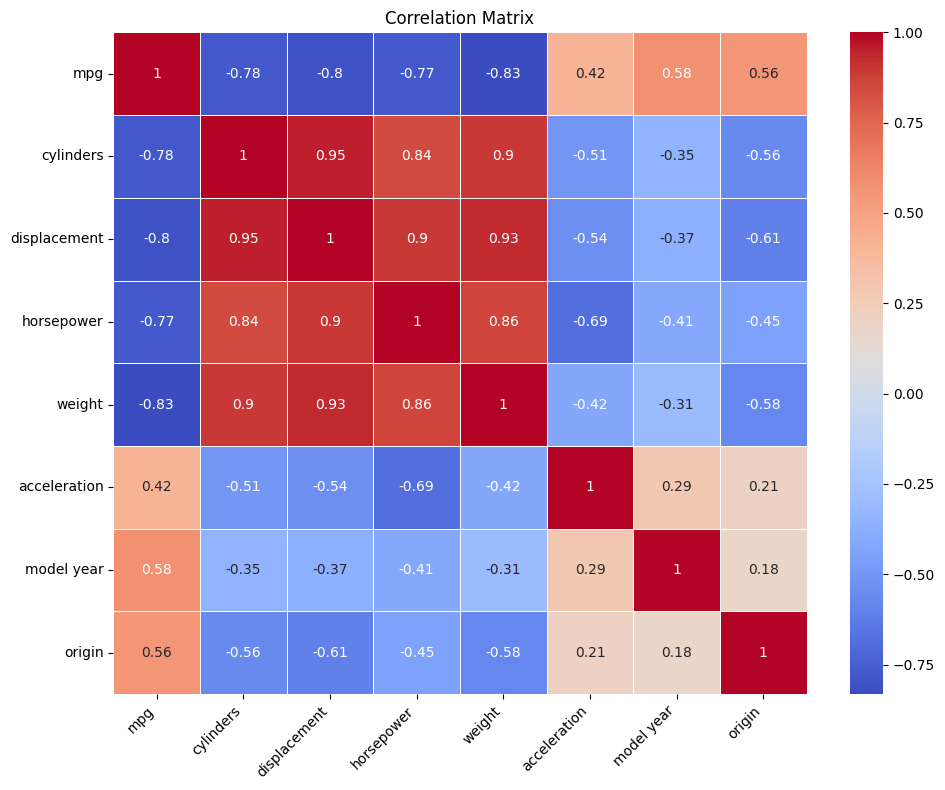


Variance of Numerical Columns:
mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1460.969052
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
dtype: float64


In [ ]:
# Dataframe Information
print("Dataframe Information:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum().sum()
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()

#Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found in the DataFrame:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the DataFrame.")
print()

# Check unique values
print("Unique Values:")
# Get the number of unique values for each column
unique_counts = df.nunique()
# Display the number of unique values
print(unique_counts)

# Get value counts for the 'mpg' column
value_counts = df['mpg'].value_counts()
print("Value counts for 'mpg' column:")
print(value_counts)
print()

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Check for outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers according to IQR method.")
print()
print()
print()

print("Histograms:")
print()
# Histograms
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print()

# Correlation matrix
corr_matrix = df.corr()

# Define thresholds for interpreting correlations
moderate_corr_threshold = 0.3
high_corr_threshold = 0.6

# Function to summarize correlations
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()  # To keep track of visited pairs
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:  # Exclude self-correlation (diagonal elements)
                pair = tuple(sorted([row, col]))  # Sort pair to avoid duplicate output
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]  # Access correlation value
                    if abs(correlation) >= high_corr_threshold:
                        print(f"{row} and {col}: There is a high correlation ({correlation:.4f}).")
                    elif abs(correlation) >= moderate_corr_threshold:
                        print(f"{row} and {col}: There is a moderate correlation ({correlation:.4f}).")

# Print correlation summaries
summarize_correlations(corr_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print()

# Calculate variance for numerical columns
print("Variance of Numerical Columns:")
variances = df[numerical_cols].var()
print(variances)

**Descriptive Statistics:**

mpg (Miles Per Gallon): Ranges from 9.00 to 46.60, with an average of approximately 23.51. The standard deviation is 7.82, indicating notable variability in fuel efficiency among the vehicles.

cylinders: Varies between 3 and 8, with a mean of 5.45. The standard deviation is 1.70, reflecting moderate variability in engine cylinder counts.

displacement: Ranges from 68.00 to 455.00, with an average of 193.43. The standard deviation is 104.27, indicating considerable variation in engine sizes.

horsepower: Spans from 46.00 to 230.00, with an average of 104.30. The standard deviation is 38.22, showing a wide range of engine power levels.

weight: Ranges from 1613.00 to 5140.00, with an average of 2970.42. The high standard deviation of 846.84 suggests significant variability in vehicle weights.

acceleration: Ranges from 8.00 to 24.80, with an average of 15.57. The standard deviation is 2.76, reflecting moderate spread in acceleration performance.

model year: Ranges from 1970 to 1982, with an average of 76.01. The standard deviation is 3.70, indicating a relatively narrow range of model years.

origin: Values range from 1 to 3, with an average of 1.57. The standard deviation is 0.80, indicating low variability in the origin of the vehicles.

**Outliers:**

mpg: Contains 1 outlier, which signifies an unusually high or low value in fuel efficiency.

horsepower: Contains 11 outliers, suggesting some vehicles have significantly higher or lower horsepower than most.

acceleration: Contains 7 outliers, indicating several vehicles have unusual acceleration values compared to the majority.

**Correlation:**

mpg exhibits high negative correlations with cylinders (-0.7754), displacement (-0.8042), horsepower (-0.7735), and weight (-0.8317). This implies that higher values in these variables are associated with lower fuel efficiency.

displacement shows high positive correlations with cylinders (0.9507), horsepower (0.8958), and weight (0.9328), indicating that larger engine sizes tend to go hand-in-hand with these metrics.

acceleration, model year, and origin have moderate correlations with mpg (0.4203, 0.5793, and 0.5635, respectively), suggesting a moderate relationship with fuel efficiency.

**Variance:**

High Variance: Observed in displacement (10872.20), weight (717140.99), and horsepower (1460.97), indicating a wide spread in these features.

Low Variance: Noted in origin (0.64) and model year (13.67), showing less variability.

**Outliers**

mpg is the target and the one outlier may distort the relationships in the model, so we will remove it.

horsepower with 11 outliers could skew analysis, we could remove these and create a more robust model.

acceleration extreme values may be due to errors or not normal conditions, and we could remove them also.

In [ ]:
# Remove outliers using IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply to columns
df = remove_outliers(df, 'mpg')
df = remove_outliers(df, 'horsepower')
df = remove_outliers(df, 'acceleration')

# Confirm the removal
print("Outliers removed.")
print(df.describe())


Outliers removed.
              mpg   cylinders  displacement  horsepower       weight  \
count  378.000000  378.000000    378.000000  378.000000   378.000000   
mean    23.687037    5.383598    187.525132  101.436508  2934.256614   
std      7.524666    1.663605     98.181259   33.045643   823.258815   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     18.000000    4.000000    104.250000   76.000000  2220.000000   
50%     23.000000    4.000000    144.500000   93.250000  2764.500000   
75%     29.000000    6.000000    256.000000  115.000000  3523.750000   
max     44.600000    8.000000    429.000000  198.000000  5140.000000   

       acceleration  model year      origin  
count    378.000000  378.000000  378.000000  
mean      15.603704   76.145503    1.587302  
std        2.448718    3.623896    0.810441  
min        9.500000   70.000000    1.000000  
25%       14.000000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       1

###Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Features and target variable
X = df.drop('mpg', axis=1)
y = df['mpg']

# Correlation
correlations = df.corr()['mpg'].abs().sort_values(ascending=False)
print("Correlation with target (mpg):")
print(correlations)

# Variance Threshold
threshold = 1.0
variances = X.var()
low_variance_features = variances[variances < threshold].index
print("\nLow variance features to be removed:")
print(low_variance_features)
X = X.drop(columns=low_variance_features)

# Feature Importance from Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X, y)
importances = model_rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature importances from Random Forest:")
print(importance_df)

# Recursive Feature Elimination (RFE)
model_lr = LinearRegression()
rfe = RFE(model_lr, n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("\nSelected Features using RFE:")
print(selected_features)

Correlation with target (mpg):
mpg             1.000000
weight          0.832572
displacement    0.805198
horsepower      0.783418
cylinders       0.769947
origin          0.554261
model year      0.546213
acceleration    0.359691
Name: mpg, dtype: float64

Low variance features to be removed:
Index(['origin'], dtype='object')

Feature importances from Random Forest:
        Feature  Importance
1  displacement    0.350996
3        weight    0.211631
0     cylinders    0.191748
5    model year    0.126088
2    horsepower    0.091622
4  acceleration    0.027915

Selected Features using RFE:
Index(['cylinders', 'horsepower', 'weight', 'acceleration', 'model year'], dtype='object')


We will use cylinders, horsepower, weight, model year, and acceleration due to the high correlation with mpg and they are also highlighted by the Random Forest model as important.

###Data Preparation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# features
features = ['cylinders', 'horsepower', 'weight', 'acceleration', 'model year']
X = df[features]
y = df['mpg']

# Print selected features
print("Selected features:")
print(X.columns.tolist())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print training and testing set sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Selected features:
['cylinders', 'horsepower', 'weight', 'acceleration', 'model year']
Training set size: 302 samples
Testing set size: 76 samples


###Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# features / target
features = ['cylinders', 'horsepower', 'weight', 'acceleration', 'model year']
X = df[features]
y = df['mpg']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE: Mean: {cv_rmse.mean():.4f}, Std: {cv_rmse.std():.4f}")

# Predict on training set
y_train_pred = model.predict(X_train)

# Predict on testing set
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Train: MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R^2: {train_r2:.4f}")
print(f"Test:  MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R^2: {test_r2:.4f}")

Cross-Validation RMSE: Mean: 2.9418, Std: 0.4717
Train: MAE: 0.7690, MSE: 1.1879, RMSE: 1.0899, R^2: 0.9770
Test:  MAE: 2.0828, MSE: 8.3630, RMSE: 2.8919, R^2: 0.8887


Training: The model performs well on the training data, with very low error metrics. MAE of .7690 (measures average magnitude of error in predictions-the lower the better) The  models are on average .7690 units away from true values. MSE at 1.1879 (measures average squared difference between predicted and actual). The lower the better. Here, the squared difference between predicted and actual is 1.1879. RMSE at 1.0899 (provides error magnitude in same units as the target and provides approximation how much standard deviation there is from the actual values). the typical prediction error is about 1.0899 units. R^2 of .9770 indicates proportion of variance in the target explained by the model. Here aroundn 97.70% of the variability in the target (mpg) is explained by the model, showing a good fit.

Testing: The performance is slightly worse compared to the training set with a higher MAE, MSE and a lower R^2. MAE at 2.0828 is the average units away from the true values. This suggests a drop in performance on unseen data. MSE at 8.630 suggests the model makes larger errors on the test set. RMSE at 2.8919 is also higher than the training RMSE and indicates greater typical prediction error on the test set. R^2 at 0.8887 shows that 88.87% of the variance in the mpt is explained by the model on the test set. It is good, but lower than the training R^2 suggesting drop in performance on new data.

Cross-validation: Mean RMSE at 2.9418 across 5 folds (lower the better fit) suggests the model's average error per prediction is ~2.94 units of the target variable.  Standard deviation of RMSE at 0.4717 indicates some variability in the model's performance across different folds. These two are close to the test set indicating the model performs similarly on unseen data and during cross-vaidation. The standard deviation suggests the performance is stable across different folds.

###Hyperparamater Tuning

In [ ]:
best_params = {
    'n_estimators': 200,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': None,
    'bootstrap': True
}

model_best = RandomForestRegressor(**best_params, random_state=42)
model_best.fit(X_train, y_train)

# Predict on test set
y_test_pred_best = model_best.predict(X_test)

# Calculate metrics for the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error

test_mae_best = mean_absolute_error(y_test, y_test_pred_best)
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
test_rmse_best = mean_squared_error(y_test, y_test_pred_best, squared=False)
test_r2_best = r2_score(y_test, y_test_pred_best)

print(f"Test: MAE: {test_mae_best:.4f}, MSE: {test_mse_best:.4f}, RMSE: {test_rmse_best:.4f}, R^2: {test_r2_best:.4f}")


Test: MAE: 2.1761, MSE: 9.5417, RMSE: 3.0890, R^2: 0.8730


The performance metrics are worse after tuning.

###Summary

The initial Random Forest Regressor showed strong performance on the training set but experienced a drop in performance on the test set, suggesting possible overfitting. It achieved good training performance with an R^2 of 0.9770 but showed a performance drop on the test set with an R^2 of 0.8887.

The hyperparameter tuning did not improve the performance on the test set.

Next steps would be to explore ways to further refine or add feature engineering.